## Import Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [6]:
df = pd.read_csv("data/movies.csv")

## Understanding the Data

In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Cleaning Data

### Dropping Unnecessary Columns

In [9]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

Getting rid of 'director', 'writer', 'star', 'country', and 'company.' I'm simply not using them in my data, though they can certainly be useful for future/other studies.

In [10]:
df = df[['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
        'budget', 'gross', 
       'runtime']]

df.shape

(7668, 15)

### Dropping Duplicates

In [11]:
df.duplicated().sum()

0

Check for duplicate movies.

In [12]:
df.duplicated("name").sum()
df.loc[df.duplicated(["name"], keep=False)].sort_values(["name"])

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
483,A Nightmare on Elm Street,R,Horror,1984,"November 16, 1984 (United States)",7.5,212000.0,Wes Craven,Wes Craven,Heather Langenkamp,United States,1800000.0,2.550714e+07,New Line Cinema,91.0
5712,A Nightmare on Elm Street,R,Crime,2010,"April 30, 2010 (United States)",5.2,95000.0,Samuel Bayer,Wesley Strick,Jackie Earle Haley,United States,35000000.0,1.156952e+08,New Line Cinema,95.0
7556,After the Wedding,PG-13,Drama,2019,"November 1, 2019 (United Kingdom)",6.3,6700.0,Bart Freundlich,Bart Freundlich,Julianne Moore,United States,NaN,2.790019e+06,Sony Pictures Classics,112.0
4995,After the Wedding,R,Drama,2006,"May 11, 2007 (United States)",7.7,33000.0,Susanne Bier,Susanne Bier,Mads Mikkelsen,Denmark,NaN,1.163272e+07,Zentropa Entertainments,120.0
7481,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Venom,R,Horror,1981,"January 29, 1982 (United States)",5.8,2600.0,Piers Haggard,Alan Scholefield,Klaus Kinski,United Kingdom,NaN,5.229643e+06,Morison Film Group,92.0
3708,Where the Heart Is,PG-13,Comedy,2000,"April 28, 2000 (United States)",6.7,32000.0,Matt Williams,Lowell Ganz,Natalie Portman,United States,15000000.0,4.086372e+07,Twentieth Century Fox,120.0
1812,Where the Heart Is,R,Comedy,1990,"February 23, 1990 (United States)",6.0,1500.0,John Boorman,Telsche Boorman,Dabney Coleman,United States,15000000.0,1.106475e+06,Touchstone Pictures,107.0
836,Wuthering Heights,Not Rated,Drama,1985,"October 9, 1985 (France)",6.5,339.0,Jacques Rivette,Pascal Bonitzer,Fabienne Babe,France,NaN,NaN,La Cecilia,130.0


The repeats are simply remakes––I'm going to keep these in my data.

### Dropping Null Values

In [13]:
df = df.dropna()

In [14]:
df.isna().sum() / df.shape[0]

name        0.0
rating      0.0
genre       0.0
year        0.0
released    0.0
score       0.0
votes       0.0
director    0.0
writer      0.0
star        0.0
country     0.0
budget      0.0
gross       0.0
company     0.0
runtime     0.0
dtype: float64

### 1. What genre of movie tends to make the most profit?

How much profit total has each genre made (in billions of $)?

In [21]:
df["profit"] = df["gross"] - df["budget"]
profit_by_genre = df.groupby("genre")["profit"].sum().sort_values(ascending=False)
print(profit_by_genre / 1000000000)

genre
Action       155.019856
Animation     56.724339
Comedy        54.402469
Drama         32.040825
Adventure     28.550152
Biography     11.181572
Crime         10.999106
Horror        10.888988
Family         1.869833
Mystery        1.462191
Fantasy        0.928827
Thriller       0.208217
Sci-Fi         0.079161
Romance        0.047677
Western       -0.000974
Name: profit, dtype: float64


Western movies actually lose money, which is not surrpising considering their downfall over the last 60 or so years.  I'm surprised that Science Fiction movies are not profitable, though. That genre is usually paired with action, so you'd think they'd gross more.

What is the average profit of each genre?

In [25]:
average_profit_per_genre = df.groupby('genre')['profit'].mean()
print(average_profit_per_genre / 1000000)

genre
Action       109.554668
Adventure     87.309333
Animation    204.781008
Biography     35.953606
Comedy        36.365287
Crime         27.566682
Drama         37.127259
Family       467.458147
Fantasy       22.654308
Horror        43.382422
Mystery       86.011263
Romance        9.535381
Sci-Fi        13.193436
Thriller      29.745284
Western       -0.487057
Name: profit, dtype: float64


<Axes: title={'center': 'Profit vs. Genre'}, xlabel='genre', ylabel='profit'>

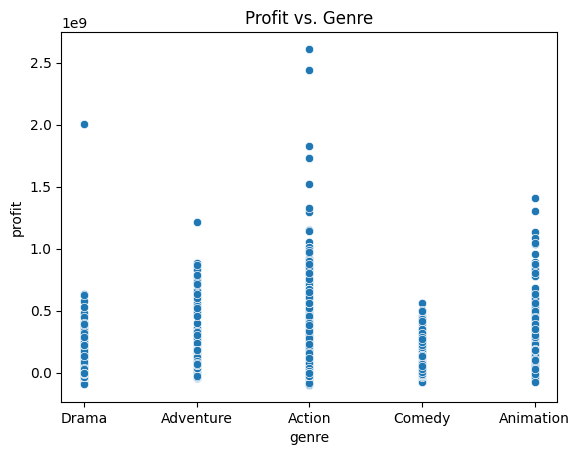

In [72]:
plt.title("Profit vs. Genre")
top_five_genres = ["Action", "Animation", "Comedy", "Drama", "Adventure"]
df_top_five = df.loc[df["genre"].isin(top_five_genres)]
sns.scatterplot(data=df_top_five, x="genre", y = "profit")

Drama and comedy seem to be consistently drawing in the least amount of viewers in their box office lifespan. Action certainly has the highest grossing movies but also consistently bring in the most money, followed by animation and adventure. This is not a surprise. Action movies appeal to the widest audience along with animation (whole families usually go to see these movies and they tend to become cultural phenomenons). 

<Axes: title={'center': 'Action Movies Gross'}, xlabel='gross'>

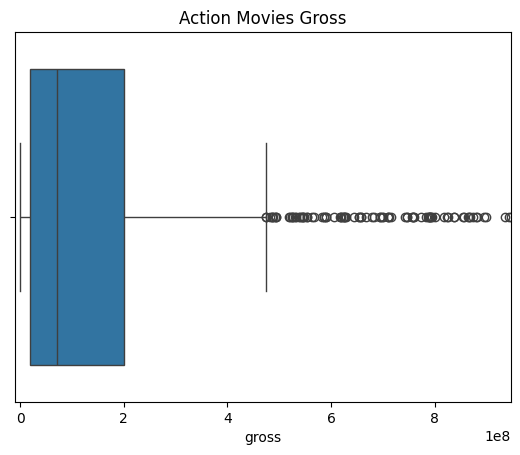

In [65]:
plt.title("Action Movies Gross")
plt.xlim(-10000000, df['gross'].quantile(0.99)) 
action_movies = df[df['genre'] == 'Action']
sns.boxplot(data=action_movies, x="gross")

<Axes: title={'center': 'Action Movies Gross'}, xlabel='gross'>

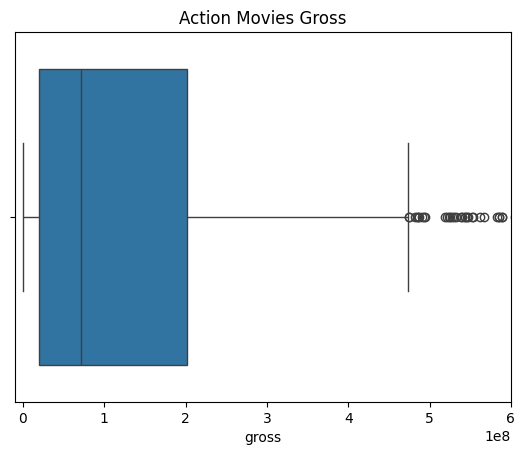

In [66]:
plt.title("Action Movies Gross")
plt.xlim(-10000000, 600000000) 
action_movies = df[df['genre'] == 'Action']
sns.boxplot(data=action_movies, x="gross")

Yes, action movies are consistently grossing decent numbers, but most of where the money comes is from the hits.

2. Do the highest grossing movies tend to have the best scores?

<Axes: title={'center': 'Score vs. Gross'}, xlabel='gross', ylabel='score'>

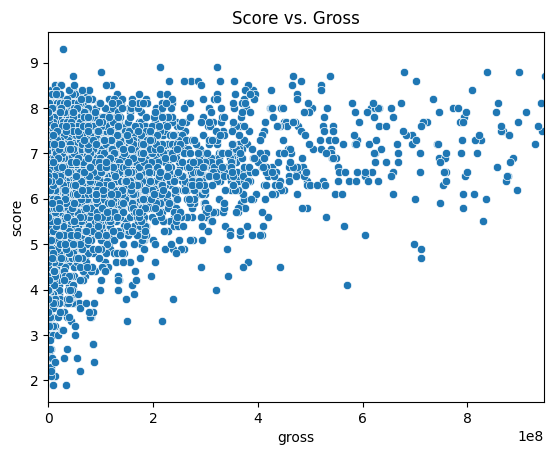

In [71]:
plt.title("Score vs. Gross")


plt.xlim(0, df['gross'].quantile(0.99)) 


sns.scatterplot(data=df, x="gross", y = "score")

There seems to be no correlation between gross and total score, which is somewhat surprising. Most of the time, the movies who gross the most have the highest budget and usually the movies with the highest budget have the best directors. With the emergence of Indie studios like A24, great smaller budget movies are being made (which gross less), which could be partially why. But this data goes back to 1980, so that likely hasn't changed this graph much. Also, most of the worst movies grossed the least. Other than that, there's no clear correlation.

3. Do longer or shorter movies gross more?

<Axes: title={'center': 'Gross vs. Runtime'}, xlabel='runtime', ylabel='gross'>

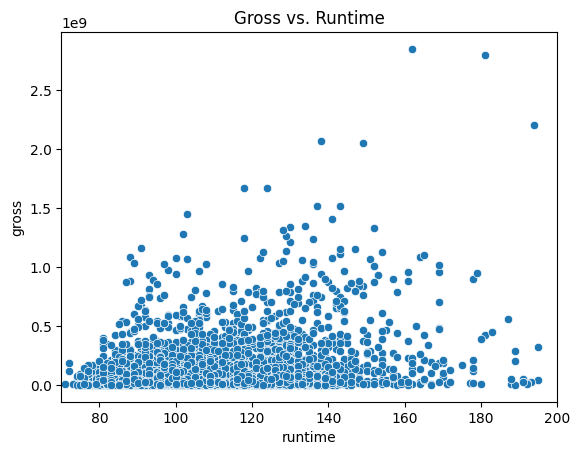

In [70]:
plt.title("Gross vs. Runtime")
plt.xlim(70, 200) 
sns.scatterplot(data=df, x="runtime", y = "gross")

<Axes: title={'center': 'Gross vs. Runtime'}, xlabel='runtime', ylabel='gross'>

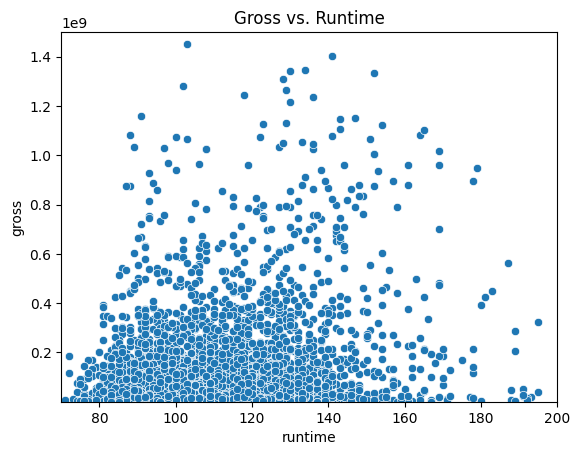

In [69]:
plt.title("Gross vs. Runtime")
plt.xlim(70, 200) 
plt.ylim(70, 1500000000) 
sns.scatterplot(data=df, x="runtime", y = "gross")

Runtime, surprisingly, has no correlation to how much money a movie makes. I usually avoid longer movies in theaters and wait for them to come to streaming so I can watch at home, which is why I'm surprised. It seems to slightly dip off at the end (over 180 minutes runtime), but not enough to make a claim that these two are related.

<Axes: title={'center': 'Gross vs. Runtime after 2000'}, xlabel='runtime', ylabel='gross'>

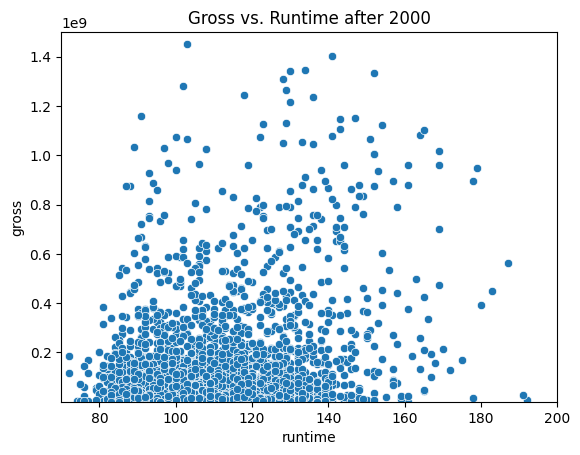

In [73]:
recent = df[df['year'] > 2000]
plt.title("Gross vs. Runtime after 2000")
plt.xlim(70, 200) 
plt.ylim(70, 1500000000) 
sns.scatterplot(data=recent, x="runtime", y = "gross")

I wondered if my theory that shorter movies did better would be true if I only looked at recent data, though that also seems not to be true. 

## Why?

This can be a useful tool for production companies looking for which movie would be most profitable or gross the most money. It is wildley difficult to try and predict an audience reaction to any piece of art, so using Data Analysis can give them a leg up. 
I didn't use columns like 'director' or 'writer' or 'country', but those could easily be used if companies want to see what creators produce the highest grossing films, though you can usually predict that without Data Analysis.

### Future

I'd probably use the columns I cut out to analyze which actors or directors draw more people to the box office. Also, if I used 'country', I could do an in-depth analysis of different movie industries and how they compare